<a href="https://colab.research.google.com/github/sks9699/Api/blob/master/simple_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d sks9699/leaf-class

100% 6.55G/6.56G [01:48<00:00, 58.5MB/s]
100% 6.56G/6.56G [01:48<00:00, 64.8MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/leaf-class.zip','r')
zip_ref.extractall('/content/dataset')
zip_ref.close()

In [ ]:
# TRAIN_DIR = "./DATABASE"
ORG_DIR = "/content/dataset/dataset/train"
CLASS = ['Alstonia Scholaris',
         'Arjun',
         'Bael',
         'Basil',
         'Chinar',
         'Gauva',
         'Jamun',
         'Jatropha',
         'Lemon',
         'Mango',
         'Pomegranate',
         'Pongamia Pinnata']

In [ ]:
import os
from keras.applications.xception  import preprocess_input

import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Define your custom CNN architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))  # 12 classes for leaf species

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
train_datagen = ImageDataGenerator(featurewise_center=True,
                                   rotation_range=0.4,
                                   width_shift_range=0.3,
                                   horizontal_flip=True,
                                   preprocessing_function=preprocess_input,
                                   zoom_range=0.4,
                                   shear_range=0.4)
train_data = train_datagen.flow_from_directory(directory='/content/dataset/dataset/train',
                                               target_size=(256, 256),
                                               batch_size=36)

# Load and preprocess the validation data
val_datagen = ImageDataGenerator(featurewise_center=True,
                                 preprocessing_function=preprocess_input
                                 )
val_data = val_datagen.flow_from_directory(directory='/content/dataset/dataset/val',
                                           target_size=(256, 256),
                                           batch_size=36)

Found 3146 images belonging to 12 classes.
Found 894 images belonging to 12 classes.


In [ ]:
train_data.class_indices

swapped_dict = {v: k for k, v in train_data.class_indices.items()}
swapped_dict

{0: 'Alstonia Scholaris (P2)',
 1: 'Arjun (P1)',
 2: 'Bael (P4)',
 3: 'Basil (P8)',
 4: 'Chinar (P11)',
 5: 'Gauva (P3)',
 6: 'Jamun (P5)',
 7: 'Jatropha (P6)',
 8: 'Lemon (P10)',
 9: 'Mango (P0)',
 10: 'Pomegranate (P9)',
 11: 'Pongamia Pinnata (P7)'}

In [ ]:
t_img,label = train_data.next()

In [ ]:
t_img.shape

(36, 256, 256, 3)

In [ ]:
def plotImage(img_arr,label):
  for idx,img in enumerate (img_arr):
      if idx<=10:
        plt.figure(figsize=(5,5))
        plt.imshow(img)
        plt.title(img.shape)
        plt.axis=False
        plt.show

In [ ]:
# plotImage(t_img,label)

In [ ]:
mc = ModelCheckpoint(filepath="./best_model.h5",
                     monitor='accuracy',
                     verbose=1,
                     save_best_only=True)
es = EarlyStopping(monitor='accuracy',
                   min_delta=0.01,
                   patience=5,
                   verbose=1)
cb = [mc, es]

In [14]:
# Train the model
his = model.fit_generator(train_data,
                          steps_per_epoch=16,
                          epochs=25,
                          validation_data=val_data,
                          validation_steps=16,
                          callbacks=cb)

<ipython-input-14-694aac203039>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train_data,


Epoch 1/100
16/16 [==============================] - ETA: 0s - loss: 2.9955 - accuracy: 0.1354
Epoch 1: accuracy improved from -inf to 0.13542, saving model to ./best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 182s 11s/step - loss: 2.9955 - accuracy: 0.1354 - val_loss: 2.3363 - val_accuracy: 0.2483
Epoch 2/100
16/16 [==============================] - ETA: 0s - loss: 2.2809 - accuracy: 0.2118
Epoch 2: accuracy improved from 0.13542 to 0.21181, saving model to ./best_model.h5
16/16 [==============================] - 227s 15s/step - loss: 2.2809 - accuracy: 0.2118 - val_loss: 2.0661 - val_accuracy: 0.2899
Epoch 3/100
16/16 [==============================] - ETA: 0s - loss: 2.1945 - accuracy: 0.2344
Epoch 3: accuracy improved from 0.21181 to 0.23438, saving model to ./best_model.h5
16/16 [==============================] - 159s 10s/step - loss: 2.1945 - accuracy: 0.2344 - val_loss: 2.0223 - val_accuracy: 0.3003
Epoch 4/100
16/16 [==============================] - ETA: 0s - loss: 2.0963 - accuracy: 0.2726
Epoch 4: accuracy improved from 0.23438 to 0.27257, saving model to ./best_model.h5
16/16 [==============================] - 168s 11s/step - loss: 2.0963 

In [21]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<ipython-input-22-6e0a46cad583>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(h['accuracy'], 'go--', color='blue', label='Accuracy')


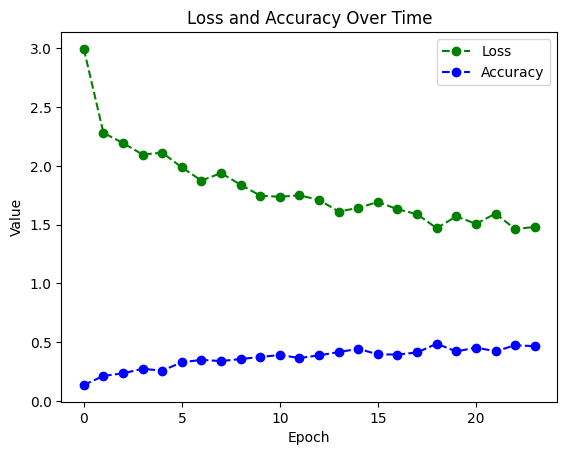

In [22]:
plt.plot(h['loss'], 'go--', label='Loss')
plt.plot(h['accuracy'], 'go--', color='blue', label='Accuracy')
plt.title("Loss and Accuracy Over Time")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.show()

<ipython-input-17-8c676993e165>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(h['val_accuracy'], 'go--', color='blue', label='val_Accuracy')


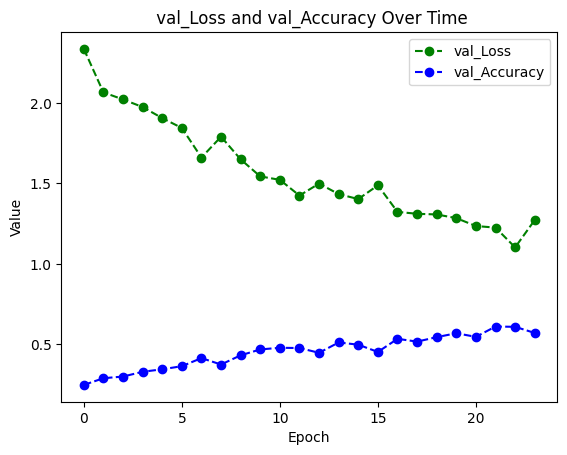

In [17]:
plt.plot(h['val_loss'], 'go--', label='val_Loss')
plt.plot(h['val_accuracy'], 'go--', color='blue', label='val_Accuracy')
plt.title(" val_Loss and val_Accuracy Over Time")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.show()

In [18]:
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [19]:
path = "/content/dataset/dataset/train/Mango (P0)/0001_0008.JPG"
img = load_img(path,target_size = (256,256))
i = img_to_array(img)
im = preprocess_input(i)
img = np.expand_dims(im,axis=0)
pred =np.argmax( model.predict(img))
print("The Image Belong to: ",swapped_dict[pred])

1/1 [==============================] - 1s 507ms/step
The Image Belong to:  Mango (P0)


In [20]:
path = "/content/lemon.jpg"
img = load_img(path,target_size = (256,256))
i = img_to_array(img)
im = preprocess_input(i)
img = np.expand_dims(im,axis=0)
pred =np.argmax( model.predict(img))
print("The Image Belong to: ",swapped_dict[pred])

FileNotFoundError: [Errno 2] No such file or directory: '/content/lemon.jpg'